In [20]:
# Pyber School Analysis 

# Observable Trends
# 1) Rural cities tend to be more expensive while Urban trips tend to be much cheaper.
#    This is because Rural cities are much more spread out, causing trips to be longer and thus more expensive.
# 2) Rural cities tend to have less drivers than Suburban and Urban cities.
#    This is because there is less of a demand for ride share services and thus a lesser supply of drivers.
# 3) Urban cities tend to share a larger percentage of every pie chart.
#    This is because there are a greater number of urban cities using ride share services compared to Suburban and Rural cities.
#    Thus with a larger volume of Urban cities causes a larger share of Total Fares, Rides, and Drivers.

In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
comb_data = pd.merge(city_data, ride_data, on='city')

# Rename Columns
comb_data = comb_data.rename(columns={'city':'City', 'date':'Date',
                                      'fare':'Fare', 'ride_id':'Ride ID',
                                      'driver_count':'Driver Count', 'type':'Type'})

# Display the data table for preview
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

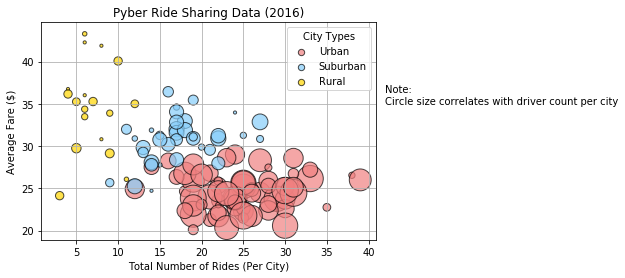

In [25]:
# Obtain the x and y coordinates for each of the three city types

# Group by city
group_city = comb_data.groupby(['City'])

# Find Average Cost per ride, Number of Rides, and Average Number of Drivers
avg_cost = group_city['Fare'].mean()
ride_count = group_city['Ride ID'].count()
driver_count = city_data.set_index('city')['driver_count']

# Find Data Series for each type of city 
city_type = city_data.set_index('city')['type']

# Create a Data Frame with the above data to use in Scatter Plot
pyber_data = pd.DataFrame({'Average Cost':avg_cost,
                           'Ride Count':ride_count,
                           'Driver Count':driver_count,
                           'Type':city_type
})

# Separate into each city type
urban = pyber_data.loc[pyber_data['Type']=='Urban']
suburban = pyber_data.loc[pyber_data['Type']=='Suburban']
rural = pyber_data.loc[pyber_data['Type']=='Rural']

# Plot each type of city: Urban, Suburban, and Rural, respectively
# S values multiplied by 10 to show bigger circles
plt.scatter(urban['Ride Count'], urban['Average Cost'], s=urban['Driver Count'] * 10, color = 'lightcoral', edgecolors = 'black',
           label = 'Urban', alpha = 0.7, linewidth = 1)
plt.scatter(suburban['Ride Count'], suburban['Average Cost'], s=suburban['Driver Count'] * 10, color = 'lightskyblue',
           edgecolors = 'black', label = 'Suburban', alpha = 0.7, linewidth = 1)
plt.scatter(rural['Ride Count'], rural['Average Cost'], s=rural['Driver Count'] * 10, color = 'gold', edgecolors = 'black',
           label = 'Rural', alpha = 0.7, linewidth = 1)

# Incorporate the other graph properties
xlim = (0,41)
ylim = (19,44)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# Create a legend
lgnd = plt.legend(title='City Types',loc='best')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city')

# Save Figure
plt.savefig("./Images/PyberRideSharingData.png")

## Total Fares by City Type

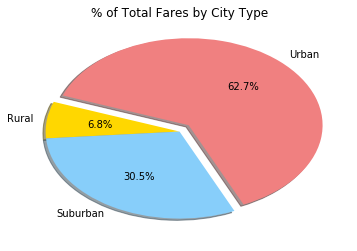

In [5]:
# Calculate Type Percents
total_fares = comb_data.groupby('Type')['Fare'].sum()

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0.1]
plt.pie(total_fares, labels = total_fares.index, colors=colors, explode=explode, autopct ='%1.1f%%', 
        shadow = True, startangle = 160)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('./Images/PercentTotalFares.png')

## Total Rides by City Type

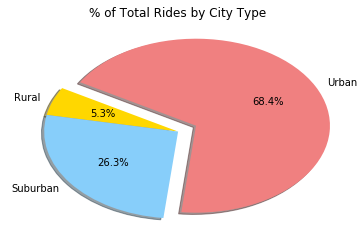

In [6]:
# Calculate Ride Percents
total_rides = comb_data.groupby('Type')['Ride ID'].count()

# Build Pie Chart
colors = ['gold','lightskyblue','lightcoral']
explode = [0, 0, 0.15]
plt.pie(total_rides, labels = total_rides.index, colors = colors, explode = explode, autopct = '%1.1f%%',
       shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('./Images/PercentTotalRides')

## Total Drivers by City Type

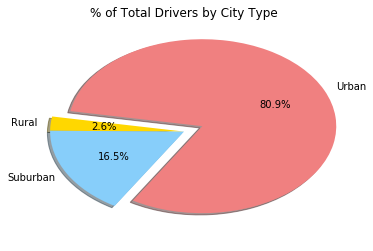

In [7]:
# Calculate Driver Percents
total_drivers = city_data.groupby('type')['driver_count'].sum()

# Build Pie Charts
colors = ['gold','lightskyblue','lightcoral']
explode = [0, 0, 0.15]
plt.pie(total_drivers, labels = total_drivers.index, colors = colors, explode = explode, autopct = '%1.1f%%',
       shadow = True, startangle = 170)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('./Images/PercentTotalDrivers')